## Cell generator

In [1]:
import cv2
from cv2 import moments,HuMoments
import pickle
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import os
import sys
sys.path.append(os.environ['REPO_DIR']+'scripts')
from extractPatches import patch_extractor
from label_patch import diffusionMap
from patch_normalizer import normalizer
from lib.utils import mark_contours, configuration

### Load parameter file

In [2]:
yamlfile=os.environ['REPO_DIR']+'shape_params.yaml'
params=configuration(yamlfile).getParams()
print(params)

{'name': 'thr', 'paths': {'s3stem': 's3://mousebraindata-open/MD657', 'patches': 'permuted', 'DiffusionMap': '/Users/kuiqian/Github/MouseBrainAtlas_dev/shapeology/notebooks/diffusionMap.pkl', 'scripts_dir': '/Users/kuiqian/Github/MouseBrainAtlas_dev/shapeology/scripts', 'data_dir': '/Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/', 'pickle_subdir': 'pickles/'}, 'preprocessing': {'polarity': -1, 'min_std': 10, 'offset': -20, 'min_area': 10}, 'normalization': {'size_thresholds': [15, 51, 251]}}


/Users/kuiqian/Github/MouseBrainAtlas_dev/shapeology/scripts/lib/utils.py:22: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  self.D=yaml.load(open(yamlFile,'r'))


### Sample display

In [10]:
from glob import glob
stack = 'MD589'
patch_dir=os.environ['ROOT_DIR']+'CSHL_patches/'+stack+'/'
structures=[dir for dir in glob(patch_dir+'*')]
patches=[dir for dir in glob(structures[1]+'/*')]
print(patches[1],len(patches))

/Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/5N/292_127.tif 11967


In [11]:
extractor=patch_extractor(patches[0],params)

/Users/kuiqian/Github/MouseBrainAtlas_dev/shapeology/shapeology_venv/lib/python3.7/site-packages/sklearn/base.py:253: UserWarning: Trying to unpickle estimator NearestNeighbors from version 0.20.0 when using version 0.20.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


<class 'pydiffmap.diffusion_map.DiffusionMap'>


In [12]:
tile=cv2.imread(patches[0],0)
if params['preprocessing']['polarity']==-1:
    tile = 255-tile
min_std=params['preprocessing']['min_std']
_std = np.std(tile.flatten())

if _std < min_std:
    print('image',patches[0],'std=',_std, 'too blank, skipping')
else:
    #t0=time()
    #print('processing',patches[0],'into',pkl_out_file)
    Stats=extractor.segment_cells(tile)
    extracted1= extractor.extract_blobs(Stats,tile)

size os asMat: (19, 2601)
(19, 2601) (19, 50)


In [13]:
extractor=patch_extractor(patches[1],params)
tile=cv2.imread(patches[1],0)
if params['preprocessing']['polarity']==-1:
    tile = 255-tile
min_std=params['preprocessing']['min_std']
_std = np.std(tile.flatten())

if _std < min_std:
    print('image',patches[1],'std=',_std, 'too blank, skipping')
else:
    #t0=time()
    #print('processing',patches[0],'into',pkl_out_file)
    Stats=extractor.segment_cells(tile)
    extracted2= extractor.extract_blobs(Stats,tile)

/Users/kuiqian/Github/MouseBrainAtlas_dev/shapeology/shapeology_venv/lib/python3.7/site-packages/sklearn/base.py:253: UserWarning: Trying to unpickle estimator NearestNeighbors from version 0.20.0 when using version 0.20.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


<class 'pydiffmap.diffusion_map.DiffusionMap'>
size os asMat: (28, 2601)
(28, 2601) (28, 50)


In [20]:
valid=[]
valid.extend(extracted1)
print(len(valid),len(extracted1))
valid.extend(extracted2)
print(len(valid),len(extracted2))

26 26
68 42


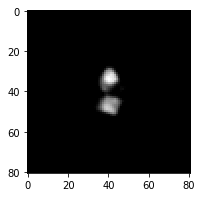

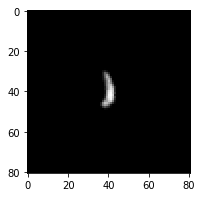

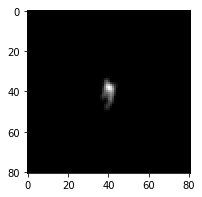

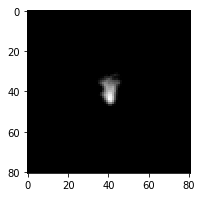

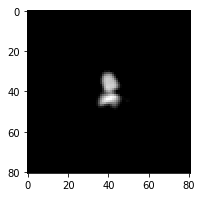

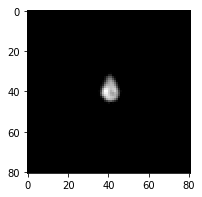

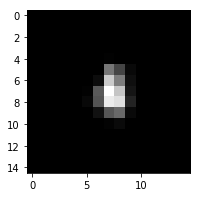

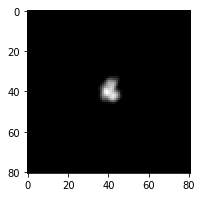

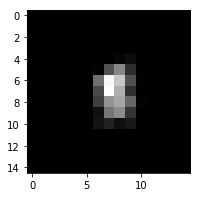

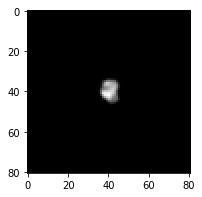

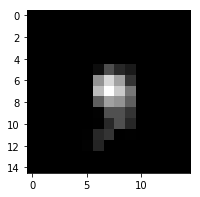

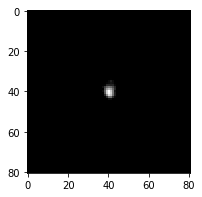

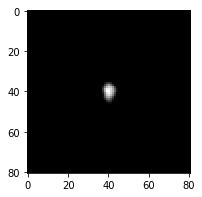

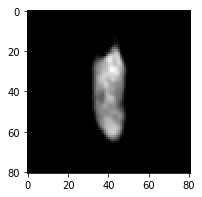

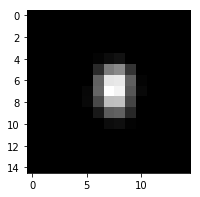

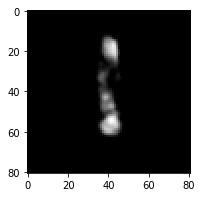

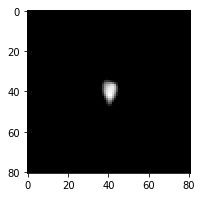

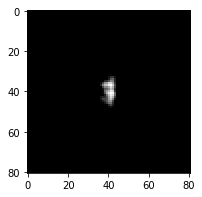

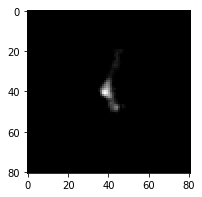

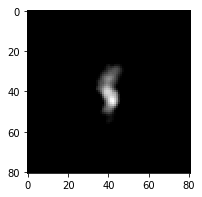

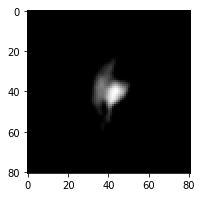

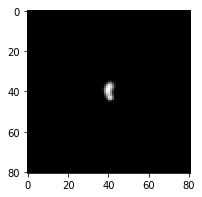

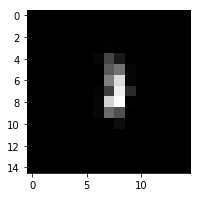

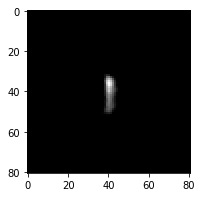

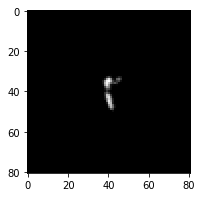

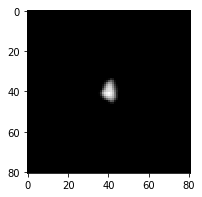

In [26]:
for i in range(len(extracted)):
    plt.figure( figsize=(3,3) )
    plt.imshow( extracted[i]['padded_patch'], cmap='gray')

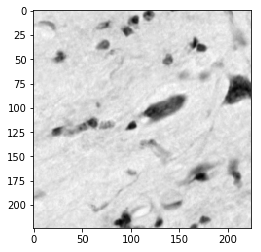

In [27]:
filename='/Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/5N/160_382.tif'
img=cv2.imread(filename,0)
plt.imshow(img,cmap='gray')

In [28]:
extracted[i]

{'left': 171,
 'top': 211,
 'width': 12,
 'height': 9,
 'area': 82,
 'normalized_patch': array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 3.75603818e-03, 0.00000000e+00, 0.0000000

In [8]:
for i in range(len(extracted)):
    print(str(extracted[i]['padded_size']))

81
81
81
81
81
81
15
81
15
81
15
81
81
81
15
81
81
81
81
81
81
81
15
81
81
81


### Loop for transferring all patches into cells

In [21]:
stack = 'MD589'
paired_structures = ['5N', '6N', '7N', '7n', 'Amb', 'LC', 'LRt', 'Pn', 'Tz', 'VLL', 'RMC', \
                     'SNC', 'SNR', '3N', '4N', 'Sp5I', 'Sp5O', 'Sp5C', 'PBG', '10N', 'VCA', 'VCP', 'DC']
singular_structures = ['AP', '12N', 'RtTg', 'SC', 'IC']

all_structures = paired_structures + singular_structures
patch_dir=os.environ['ROOT_DIR']+'CSHL_patches/'+stack+'/'
! mkdir $ROOT_DIR/CSHL_cells
cell_dir = os.environ['ROOT_DIR']+'CSHL_cells/'+stack+'/'
print(cell_dir)
! mkdir $cell_dir

mkdir: /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain//CSHL_cells: File exists
/Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_cells/MD589/
mkdir: /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_cells/MD589/: File exists


In [10]:
from time import time
from skimage import img_as_ubyte

In [11]:
t0=time()

for structure in all_structures:
    if not os.path.exists(patch_dir+structure):
        print('SKIPPING: '+structure)
        continue
    for state in ['positive','negative']:
        if state=='positive':
            patches = [dir for dir in glob(patch_dir+structure+'/*')]
        else:
            patches = [dir for dir in glob(patch_dir+structure+'_surround_200um_noclass/*')]
        savepath = cell_dir+structure+'/'
        ! mkdir $savepath
        savepath = savepath+state+'/'
        if os.path.exists(savepath):
            print(structure+' ALREADY EXIST')
            continue
        else:
            ! mkdir $savepath
            ! mkdir $savepath/15
            ! mkdir $savepath/81
            ! mkdir $savepath/251
        count=0
        for i in range(len(patches)):
            extractor=patch_extractor(patches[i],params)
            tile=cv2.imread(patches[i],0)
            if params['preprocessing']['polarity']==-1:
                tile = 255-tile
            min_std=params['preprocessing']['min_std']
            _std = np.std(tile.flatten())

            if _std < min_std:
                print('image',patches[i],'std=',_std, 'too blank, skipping')
            else:
                Stats=extractor.segment_cells(tile)
                extracted= extractor.extract_blobs(Stats,tile)
                for j in range(len(extracted)):
                    try:
                        filename=savepath+str(extracted[j]['padded_size'])+'/'+str(count)+'.tif'
                        count+=1
                        img=extracted[j]['padded_patch']
                        img=img/img.max()*255
                        img=img.astype(np.uint8)
                        cv2.imwrite(filename, img)
                    except:
                        continue
            if count>100000:
                break
    print(structure+'finished in %5.1f seconds'%(time()-t0))
    

mkdir: /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_cells/MD589/5N/: File exists
5Nfinished in 190.5 seconds
mkdir: /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_cells/MD589/6N/: File exists
6Nfinished in 231.0 seconds
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/7N/203_6.tif std= 8.923340435157714 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/7N/200_50.tif std= 8.289167142416543 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/7N/262_7.tif std= 9.62164153032683 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/7N/201_4.tif std= 9.33244877809078 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/7N/198_58.tif std= 9.712157580026192 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/7N/262_10.tif std= 9.643634504543712 too blank, skipping

image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/7N_surround_200um_noclass/186_132.tif std= 9.081437314667786 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/7N_surround_200um_noclass/178_144.tif std= 9.248597785479252 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/7N_surround_200um_noclass/158_117.tif std= 9.547448076236044 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/7N_surround_200um_noclass/314_178.tif std= 7.022390376316507 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/7N_surround_200um_noclass/184_157.tif std= 7.256330955542672 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/7N_surround_200um_noclass/304_144.tif std= 9.841136994146822 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/7N_surroun

image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/LC_surround_200um_noclass/266_646.tif std= 4.854170683284729 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/LC_surround_200um_noclass/184_597.tif std= 3.2967565516994575 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/LC_surround_200um_noclass/265_626.tif std= 2.5773040639587714 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/LC_surround_200um_noclass/265_632.tif std= 2.5467362782211094 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/LC_surround_200um_noclass/265_633.tif std= 2.603926280433825 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/LC_surround_200um_noclass/184_596.tif std= 3.930188528959263 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/LC_surr

image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/Pn_surround_200um_noclass/205_282.tif std= 3.482133206974861 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/Pn_surround_200um_noclass/207_152.tif std= 3.8207507749135283 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/Pn_surround_200um_noclass/276_668.tif std= 6.464600559145526 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/Pn_surround_200um_noclass/282_669.tif std= 2.9836302507773635 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/Pn_surround_200um_noclass/225_5.tif std= 5.0812961797058485 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/Pn_surround_200um_noclass/260_188.tif std= 3.7244202865159033 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/Pn_surro

image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/Pn_surround_200um_noclass/185_386.tif std= 3.8511480551513015 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/Pn_surround_200um_noclass/257_831.tif std= 7.158315059621579 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/Pn_surround_200um_noclass/252_64.tif std= 4.527226990871774 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/Pn_surround_200um_noclass/200_44.tif std= 4.14239497208384 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/Pn_surround_200um_noclass/266_324.tif std= 5.0326513915577955 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/Pn_surround_200um_noclass/193_472.tif std= 3.15931444177317 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/Pn_surround_

image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/Pn_surround_200um_noclass/200_112.tif std= 8.58069762916326 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/Pn_surround_200um_noclass/204_536.tif std= 4.53780882287286 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/Pn_surround_200um_noclass/257_170.tif std= 9.94352168050362 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/Pn_surround_200um_noclass/206_180.tif std= 4.039812864207708 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/Pn_surround_200um_noclass/180_228.tif std= 8.452236958884875 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/Pn_surround_200um_noclass/219_273.tif std= 1.4669630666114015 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/Pn_surround_

image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/Pn_surround_200um_noclass/274_157.tif std= 3.927563599192517 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/Pn_surround_200um_noclass/201_249.tif std= 3.3770596135972144 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/Pn_surround_200um_noclass/198_212.tif std= 3.097023231753502 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/Pn_surround_200um_noclass/275_344.tif std= 3.212297977030437 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/Pn_surround_200um_noclass/213_833.tif std= 8.388115905941293 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/Pn_surround_200um_noclass/259_86.tif std= 3.3502870276747676 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/Pn_surrou

image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/Pn_surround_200um_noclass/224_161.tif std= 4.183316174407928 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/Pn_surround_200um_noclass/248_678.tif std= 7.980768256665289 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/Pn_surround_200um_noclass/272_310.tif std= 4.607903510481072 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/Pn_surround_200um_noclass/245_129.tif std= 4.289849944446602 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/Pn_surround_200um_noclass/213_358.tif std= 3.50775970398786 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/Pn_surround_200um_noclass/290_397.tif std= 7.794004378149758 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/Pn_surround

image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/Pn_surround_200um_noclass/219_105.tif std= 1.8185593405058311 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/Pn_surround_200um_noclass/285_239.tif std= 7.391600036759392 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/Pn_surround_200um_noclass/251_294.tif std= 8.633947687068282 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/Pn_surround_200um_noclass/225_399.tif std= 4.306324201069833 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/Pn_surround_200um_noclass/218_5.tif std= 3.747993916172491 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/Pn_surround_200um_noclass/280_368.tif std= 4.068627693929785 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/Pn_surround

image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/Pn_surround_200um_noclass/219_138.tif std= 1.54177108045439 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/Pn_surround_200um_noclass/223_2.tif std= 4.337188677157609 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/Pn_surround_200um_noclass/262_339.tif std= 3.2177744365535514 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/Pn_surround_200um_noclass/213_403.tif std= 3.1596941469658812 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/Pn_surround_200um_noclass/212_79.tif std= 3.762929723983355 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/Pn_surround_200um_noclass/187_309.tif std= 3.3891873580945195 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/Pn_surround

image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/Pn_surround_200um_noclass/194_590.tif std= 8.897794550126324 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/Pn_surround_200um_noclass/224_612.tif std= 4.45400860869683 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/Pn_surround_200um_noclass/275_184.tif std= 4.977288386771008 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/Pn_surround_200um_noclass/225_401.tif std= 4.0345575317046185 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/Pn_surround_200um_noclass/272_463.tif std= 4.820393652482859 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/Pn_surround_200um_noclass/205_122.tif std= 2.9120676869661932 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/Pn_surrou

image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/Pn_surround_200um_noclass/207_231.tif std= 5.605226160972285 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/Pn_surround_200um_noclass/255_464.tif std= 3.684713080708015 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/Pn_surround_200um_noclass/202_68.tif std= 3.0989540554641577 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/Pn_surround_200um_noclass/218_30.tif std= 4.894705179960683 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/Pn_surround_200um_noclass/218_24.tif std= 4.21325430821979 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/Pn_surround_200um_noclass/217_231.tif std= 3.2157701362174156 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/Pn_surround_

image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/Pn_surround_200um_noclass/268_212.tif std= 5.208611168715543 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/Pn_surround_200um_noclass/273_68.tif std= 9.945432058214125 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/Pn_surround_200um_noclass/185_422.tif std= 3.9363691752988097 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/Pn_surround_200um_noclass/270_360.tif std= 3.233178831724429 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/Pn_surround_200um_noclass/245_289.tif std= 4.284922197165252 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/Pn_surround_200um_noclass/247_159.tif std= 3.753182025210368 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/Pn_surroun

image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/Pn_surround_200um_noclass/259_287.tif std= 8.445929196549319 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/Pn_surround_200um_noclass/192_489.tif std= 4.168653331651577 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/Pn_surround_200um_noclass/246_174.tif std= 4.388793503069105 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/Pn_surround_200um_noclass/261_359.tif std= 4.557225599946008 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/Pn_surround_200um_noclass/217_184.tif std= 3.177522461223463 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/Pn_surround_200um_noclass/252_544.tif std= 4.444958819561055 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/Pn_surroun

image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/Pn_surround_200um_noclass/280_1.tif std= 9.45288424005942 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/Pn_surround_200um_noclass/197_533.tif std= 4.425530719192109 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/Pn_surround_200um_noclass/217_49.tif std= 3.625991873780687 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/Pn_surround_200um_noclass/262_271.tif std= 3.261879348756008 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/Pn_surround_200um_noclass/256_15.tif std= 1.6170105163988875 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/Pn_surround_200um_noclass/197_255.tif std= 3.5843695390748733 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/Pn_surround_2

image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/Tz_surround_200um_noclass/267_445.tif std= 7.779763553439634 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/Tz_surround_200um_noclass/263_56.tif std= 8.986957919186944 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/Tz_surround_200um_noclass/252_225.tif std= 7.597260923813995 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/Tz_surround_200um_noclass/211_13.tif std= 9.904751566295895 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/Tz_surround_200um_noclass/217_222.tif std= 9.640232323304433 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/Tz_surround_200um_noclass/253_354.tif std= 9.389486263740968 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/Tz_surround_

image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/VLL_surround_200um_noclass/131_403.tif std= 9.085656652581307 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/VLL_surround_200um_noclass/134_234.tif std= 9.781640227421953 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/VLL_surround_200um_noclass/317_250.tif std= 8.171877472177103 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/VLL_surround_200um_noclass/156_87.tif std= 9.689730516285012 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/VLL_surround_200um_noclass/151_71.tif std= 9.862226308738276 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/VLL_surround_200um_noclass/167_302.tif std= 3.776091508042477 too blank, skipping
VLLfinished in 1413.6 seconds
mkdir: /Users/kuiqian/BstemAtlasDataBackup/ucsd_

/Users/kuiqian/Github/MouseBrainAtlas_dev/shapeology/scripts/patch_normalizer.py:11: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.dot(x**2,_sum)-np.dot(x,_sum)**2)


image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/SNR_surround_200um_noclass/184_585.tif std= 9.132638381717442 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/SNR_surround_200um_noclass/165_402.tif std= 6.635131939466323 too blank, skipping
SNRfinished in 1911.9 seconds
mkdir: /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_cells/MD589/3N/: File exists
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/3N_surround_200um_noclass/230_393.tif std= 9.97404818152323 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/3N_surround_200um_noclass/217_382.tif std= 8.297314001784985 too blank, skipping
3Nfinished in 2068.9 seconds
mkdir: /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_cells/MD589/4N/: File exists
4Nfinished in 2139.5 seconds
mkdir: /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_cells/MD589/Sp5I/: File exists
image /Users/kuiqian/BstemAtlasDa

image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/VCA_surround_200um_noclass/100_17.tif std= 3.9828290720750084 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/VCA_surround_200um_noclass/111_137.tif std= 8.766742902484202 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/VCA_surround_200um_noclass/361_267.tif std= 3.604146962368661 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/VCA_surround_200um_noclass/114_62.tif std= 8.709304522867853 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/VCA_surround_200um_noclass/111_85.tif std= 4.986748864128463 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/VCA_surround_200um_noclass/120_203.tif std= 8.756275080815232 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/VCA_su

image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/VCA_surround_200um_noclass/365_30.tif std= 4.325582005700321 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/VCA_surround_200um_noclass/365_18.tif std= 7.6430186753274985 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/VCA_surround_200um_noclass/346_103.tif std= 8.773705372926457 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/VCA_surround_200um_noclass/122_105.tif std= 7.790740045875294 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/VCA_surround_200um_noclass/105_26.tif std= 5.199768129457061 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/VCA_surround_200um_noclass/362_11.tif std= 4.510569829480769 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/VCA_sur

image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/VCA_surround_200um_noclass/117_24.tif std= 8.644905643885547 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/VCA_surround_200um_noclass/363_47.tif std= 9.467464657253315 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/VCA_surround_200um_noclass/360_275.tif std= 3.966276797796397 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/VCA_surround_200um_noclass/110_11.tif std= 7.930294586718076 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/VCA_surround_200um_noclass/104_64.tif std= 4.777146669648278 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/VCA_surround_200um_noclass/110_131.tif std= 4.535555807411643 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/VCA_surr

image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/VCP_surround_200um_noclass/122_88.tif std= 9.510148641873775 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/VCP_surround_200um_noclass/117_33.tif std= 7.36724612949714 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/VCP_surround_200um_noclass/351_220.tif std= 5.383902573643893 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/VCP_surround_200um_noclass/351_208.tif std= 8.278572023528188 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/VCP_surround_200um_noclass/342_320.tif std= 2.1928154899820402 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/VCP_surround_200um_noclass/347_271.tif std= 7.7568038562314285 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/VCP_s

image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/VCP_surround_200um_noclass/335_16.tif std= 7.737362288391872 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/VCP_surround_200um_noclass/342_322.tif std= 1.1063906854502734 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/VCP_surround_200um_noclass/107_158.tif std= 5.505858419671286 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/VCP_surround_200um_noclass/117_19.tif std= 7.760162168909473 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/VCP_surround_200um_noclass/349_185.tif std= 3.875188766207145 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/VCP_surround_200um_noclass/346_504.tif std= 5.034090112576267 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/VCP_s

image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/VCP_surround_200um_noclass/354_189.tif std= 4.232408074398893 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/VCP_surround_200um_noclass/346_503.tif std= 5.01473271973146 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/VCP_surround_200um_noclass/117_22.tif std= 9.712441802004872 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/VCP_surround_200um_noclass/117_36.tif std= 7.793043480094664 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/VCP_surround_200um_noclass/122_277.tif std= 9.993934557257655 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/VCP_surround_200um_noclass/349_196.tif std= 4.169356321406706 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/VCP_sur

image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/DC_surround_200um_noclass/309_204.tif std= 8.205104876004484 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/DC_surround_200um_noclass/320_35.tif std= 8.297669102109305 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/DC_surround_200um_noclass/314_233.tif std= 9.970540116649081 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/DC_surround_200um_noclass/109_469.tif std= 5.158382882591212 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/DC_surround_200um_noclass/111_527.tif std= 8.136407118917246 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/DC_surround_200um_noclass/138_199.tif std= 6.44443259003957 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/DC_surround_

image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/AP_surround_200um_noclass/226_82.tif std= 3.2614067285483115 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/AP_surround_200um_noclass/219_58.tif std= 1.6847079464913173 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/AP_surround_200um_noclass/217_75.tif std= 2.8016378998246796 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/AP_surround_200um_noclass/217_77.tif std= 5.226566291296191 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/AP_surround_200um_noclass/222_27.tif std= 3.857163000924371 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/AP_surround_200um_noclass/227_4.tif std= 4.79605913506398 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/AP_surround_200

image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/AP_surround_200um_noclass/225_66.tif std= 5.291299570780794 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/AP_surround_200um_noclass/216_57.tif std= 3.7595390052461006 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/AP_surround_200um_noclass/218_52.tif std= 3.7700172808058157 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/AP_surround_200um_noclass/226_4.tif std= 3.330030635112636 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/AP_surround_200um_noclass/218_85.tif std= 3.160584161903032 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/AP_surround_200um_noclass/220_56.tif std= 6.87925919638326 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/AP_surround_200u

image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/AP_surround_200um_noclass/218_43.tif std= 3.6777504400519274 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/AP_surround_200um_noclass/226_1.tif std= 3.5097475691953215 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/AP_surround_200um_noclass/223_16.tif std= 4.108976372853062 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/AP_surround_200um_noclass/230_56.tif std= 3.4898807702776122 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/AP_surround_200um_noclass/224_37.tif std= 2.818550926587554 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/AP_surround_200um_noclass/229_88.tif std= 3.6892749320050267 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/AP_surround_2

image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/AP_surround_200um_noclass/228_29.tif std= 3.0395608420245934 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/AP_surround_200um_noclass/218_61.tif std= 3.5261964884573223 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/AP_surround_200um_noclass/216_64.tif std= 3.8659692567044317 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/AP_surround_200um_noclass/223_34.tif std= 4.252677018062791 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/AP_surround_200um_noclass/228_4.tif std= 3.572173501168488 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/AP_surround_200um_noclass/227_93.tif std= 3.0709629219262244 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/AP_surround_2

image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/AP_surround_200um_noclass/217_57.tif std= 4.489462307821964 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/AP_surround_200um_noclass/217_47.tif std= 2.5353194146132583 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/AP_surround_200um_noclass/225_22.tif std= 4.21096823712646 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/AP_surround_200um_noclass/226_73.tif std= 8.129938141265276 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/AP_surround_200um_noclass/223_56.tif std= 9.208321296955743 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/AP_surround_200um_noclass/229_6.tif std= 9.085422864174967 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/AP_surround_200um

image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/SC_surround_200um_noclass/217_152.tif std= 9.925575996317237 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/SC_surround_200um_noclass/213_576.tif std= 2.7990277299863413 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/SC_surround_200um_noclass/276_1164.tif std= 6.949276104830492 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/SC_surround_200um_noclass/216_427.tif std= 1.9962976377647192 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/SC_surround_200um_noclass/224_1070.tif std= 5.275529617659641 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/SC_surround_200um_noclass/217_807.tif std= 6.8130425946594215 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/SC_su

image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/IC_surround_200um_noclass/171_608.tif std= 2.9733704018894223 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/IC_surround_200um_noclass/169_593.tif std= 9.40659376221118 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/IC_surround_200um_noclass/231_346.tif std= 2.4854303126349726 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/IC_surround_200um_noclass/195_386.tif std= 2.970004090395993 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/IC_surround_200um_noclass/224_217.tif std= 9.763570524578155 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/IC_surround_200um_noclass/193_314.tif std= 2.1268830796467872 too blank, skipping
image /Users/kuiqian/BstemAtlasDataBackup/ucsd_brain/CSHL_patches/MD589/IC_surro